#### Importar datos ####

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\shara\OneDrive - Universidad Autónoma Latinoamericana\7mo semestre\Ciencia de datos II\winequality-red.csv')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### Descripción de las variables

- **Acidez fija (fixed acidity):** Corresponde al conjunto de ácidos orgánicos de baja volatilidad como el málico, láctico, tartárico o cítrico, que no se evaporan fácilmente y forman parte inherente de las características del vino. La acidez total de una muestra puede cuantificarse de forma no diferenciada o en grupos como acidez fija y acidez volátil.

- **Acidez volátil (volatile acidity):** Representa la cantidad de ácido acético en el vino. Si su nivel es demasiado alto, puede provocar un sabor desagradable a vinagre. Incluye ácidos orgánicos de cadena corta que pueden extraerse mediante destilación, como el ácido fórmico, acético, propiónico y butírico.

- **Ácido cítrico (citric acid):** Presente en pequeñas cantidades, puede aportar frescura y sabor al vino. Es un ácido orgánico débil y sin color que se encuentra de forma natural en los cítricos y participa en el ciclo del ácido cítrico en organismos aeróbicos.

- **Azúcar residual (residual sugar):** Es la cantidad de azúcar que queda tras finalizar la fermentación. Afecta la dulzura del vino y se mide en gramos por litro (g/L). Es raro encontrar vinos con menos de 1 g/L de azúcar residual.

- **Cloruros (chlorides):** Indican la cantidad de sal en el vino. En la vinificación del vino tinto se extraen más cloruros debido a los iones presentes en las pieles durante la fermentación. El nivel legal máximo es de 606 mg/L.

- **Dióxido de azufre libre (free sulfur dioxide):** Es la forma de SO₂ que puede reaccionar y actuar como agente antimicrobiano y antioxidante. Existe en equilibrio entre el SO₂ molecular disuelto y el ion bisulfito. La suma del SO₂ libre y el combinado constituye el SO₂ total.

- **Dióxido de azufre total (total sulfur dioxide):** Es la suma de las formas libres y combinadas del SO₂. En bajas concentraciones es mayormente indetectable, pero sigue cumpliendo funciones conservantes y antimicrobianas.

- **Densidad (density):** Está relacionada con el contenido de azúcar y alcohol del vino. Se mide con un hidrómetro, un instrumento que compara la densidad del vino con la del agua, resultando en la gravedad específica.

- **pH:** Mide cuán ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico). La mayoría de los vinos se encuentran entre 3 y 4. Un pH alto (>3.65) puede aumentar el riesgo de deterioro microbiano y afectar la estabilidad del vino durante su envejecimiento.

- **Sulfatos (sulphates):** Son aditivos que pueden contribuir a los niveles de dióxido de azufre (SO₂), ayudando a prevenir el crecimiento de bacterias y levaduras. Aunque se producen naturalmente durante la fermentación, también se añaden para conservar el vino. Algunas personas con alergia al azufre pueden presentar reacciones como dolores de cabeza o congestión nasal.

- **Alcohol:** Porcentaje de contenido alcohólico del vino.

- **Calidad (quality):** Variable de salida, basada en datos sensoriales. Es una puntuación que va de 3 a 8.

In [31]:
# Seleccionar las columnas de interés
columnas_seleccionadas = ['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'alcohol', 'sulphates', 'density', 'quality']
df_seleccionado = data[columnas_seleccionadas]

# Verificar si hay valores nulos en el DataFrame seleccionado
print(df_seleccionado.isnull().sum())

# Verificar el tipo de datos de las columnas en el DataFrame seleccionado
print(df_seleccionado.dtypes)

fixed acidity       0
volatile acidity    0
residual sugar      0
pH                  0
alcohol             0
sulphates           0
density             0
quality             0
dtype: int64
fixed acidity       float64
volatile acidity    float64
residual sugar      float64
pH                  float64
alcohol             float64
sulphates           float64
density             float64
quality               int64
dtype: object


#### Pipeline

#### Detectar outliers ####

Si los datos tienen outliers con valores muy grandes en algunas características, estos outliers podrían dominar la varianza y hacer que los primeros componentes principales del PCA estén fuertemente influenciados por estos y afecten la estructura subyacente de los datos. Al aplicar una transformación logarítmica primero, se reduce la magnitud relativa de estos valores extremos, permitiendo que el PCA capture mejor la variabilidad principal de los datos después de la transformación.

In [3]:
import pandas as pd
import numpy as np

def detectar_y_listar_outliers_iqr_original(data):
    
    outliers_info = {}
    original_numerical_cols = [col for col in data.select_dtypes(include=np.number).columns if not col.startswith('Log_') and col != 'quality']

    for column in original_numerical_cols:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].tolist()
        outliers_info[column] = {'lower_bound': lower_bound,
                                  'upper_bound': upper_bound,
                                  'num_outliers': len(outliers)}

    outliers_table = pd.DataFrame.from_dict(outliers_info, orient='index')
    print("\nCantidad de posibles outliers por columna:")
    print(outliers_table[['num_outliers']])
    print("\nLímites para la detección de posibles outliers (IQR) las columnas:")
    return outliers_table[['lower_bound', 'upper_bound']]

# Aplicar la función
outlier_limits_original = detectar_y_listar_outliers_iqr_original(data)
print(outlier_limits_original)


Cantidad de posibles outliers por columna:
                      num_outliers
fixed acidity                   49
volatile acidity                19
citric acid                      1
residual sugar                 155
chlorides                      112
free sulfur dioxide             30
total sulfur dioxide            55
density                         45
pH                              35
sulphates                       59
alcohol                         13

Límites para la detección de posibles outliers (IQR) las columnas:
                      lower_bound  upper_bound
fixed acidity            3.950000    12.350000
volatile acidity         0.015000     1.015000
citric acid             -0.405000     0.915000
residual sugar           0.850000     3.650000
chlorides                0.040000     0.120000
free sulfur dioxide    -14.000000    42.000000
total sulfur dioxide   -38.000000   122.000000
density                  0.992248     1.001187
pH                       2.925000     3.68500

In [21]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Lista de columnas a transformar
columnas_log = ['fixed acidity', 'volatile acidity', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                'sulphates', 'alcohol']

# Función de transformación logarítmica
def log_transform(df):
    df_copy = df.copy()
    for col in columnas_log:
        if (df_copy[col] <= 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores no positivos. No se aplicará la transformación logarítmica.")
        else:
            df_copy[f"Log_{col}"] = np.log(df_copy[col])
    return df_copy[[col for col in df_copy.columns if col.startswith("Log_") or col not in columnas_log]]

# Crear el pipeline
pipeline = Pipeline([
    ('log_transform', FunctionTransformer(log_transform, validate=False))
])

# Aplicar el pipeline
data_transformada = pipeline.fit_transform(data)

# Mostrar resultado
print("\nDataFrame actualizado (solo columnas log-transformadas):")
print(data_transformada.head())



DataFrame actualizado (solo columnas log-transformadas):
   citric acid  density    pH  quality  Log_fixed acidity  \
0         0.00   0.9978  3.51        5           2.001480   
1         0.00   0.9968  3.20        5           2.054124   
2         0.04   0.9970  3.26        5           2.054124   
3         0.56   0.9980  3.16        6           2.415914   
4         0.00   0.9978  3.51        5           2.001480   

   Log_volatile acidity  Log_residual sugar  Log_chlorides  \
0             -0.356675            0.641854      -2.577022   
1             -0.127833            0.955511      -2.322788   
2             -0.274437            0.832909      -2.385967   
3             -1.272966            0.641854      -2.590267   
4             -0.356675            0.641854      -2.577022   

   Log_free sulfur dioxide  Log_total sulfur dioxide  Log_sulphates  \
0                 2.397895                  3.526361      -0.579818   
1                 3.218876                  4.204693      -0

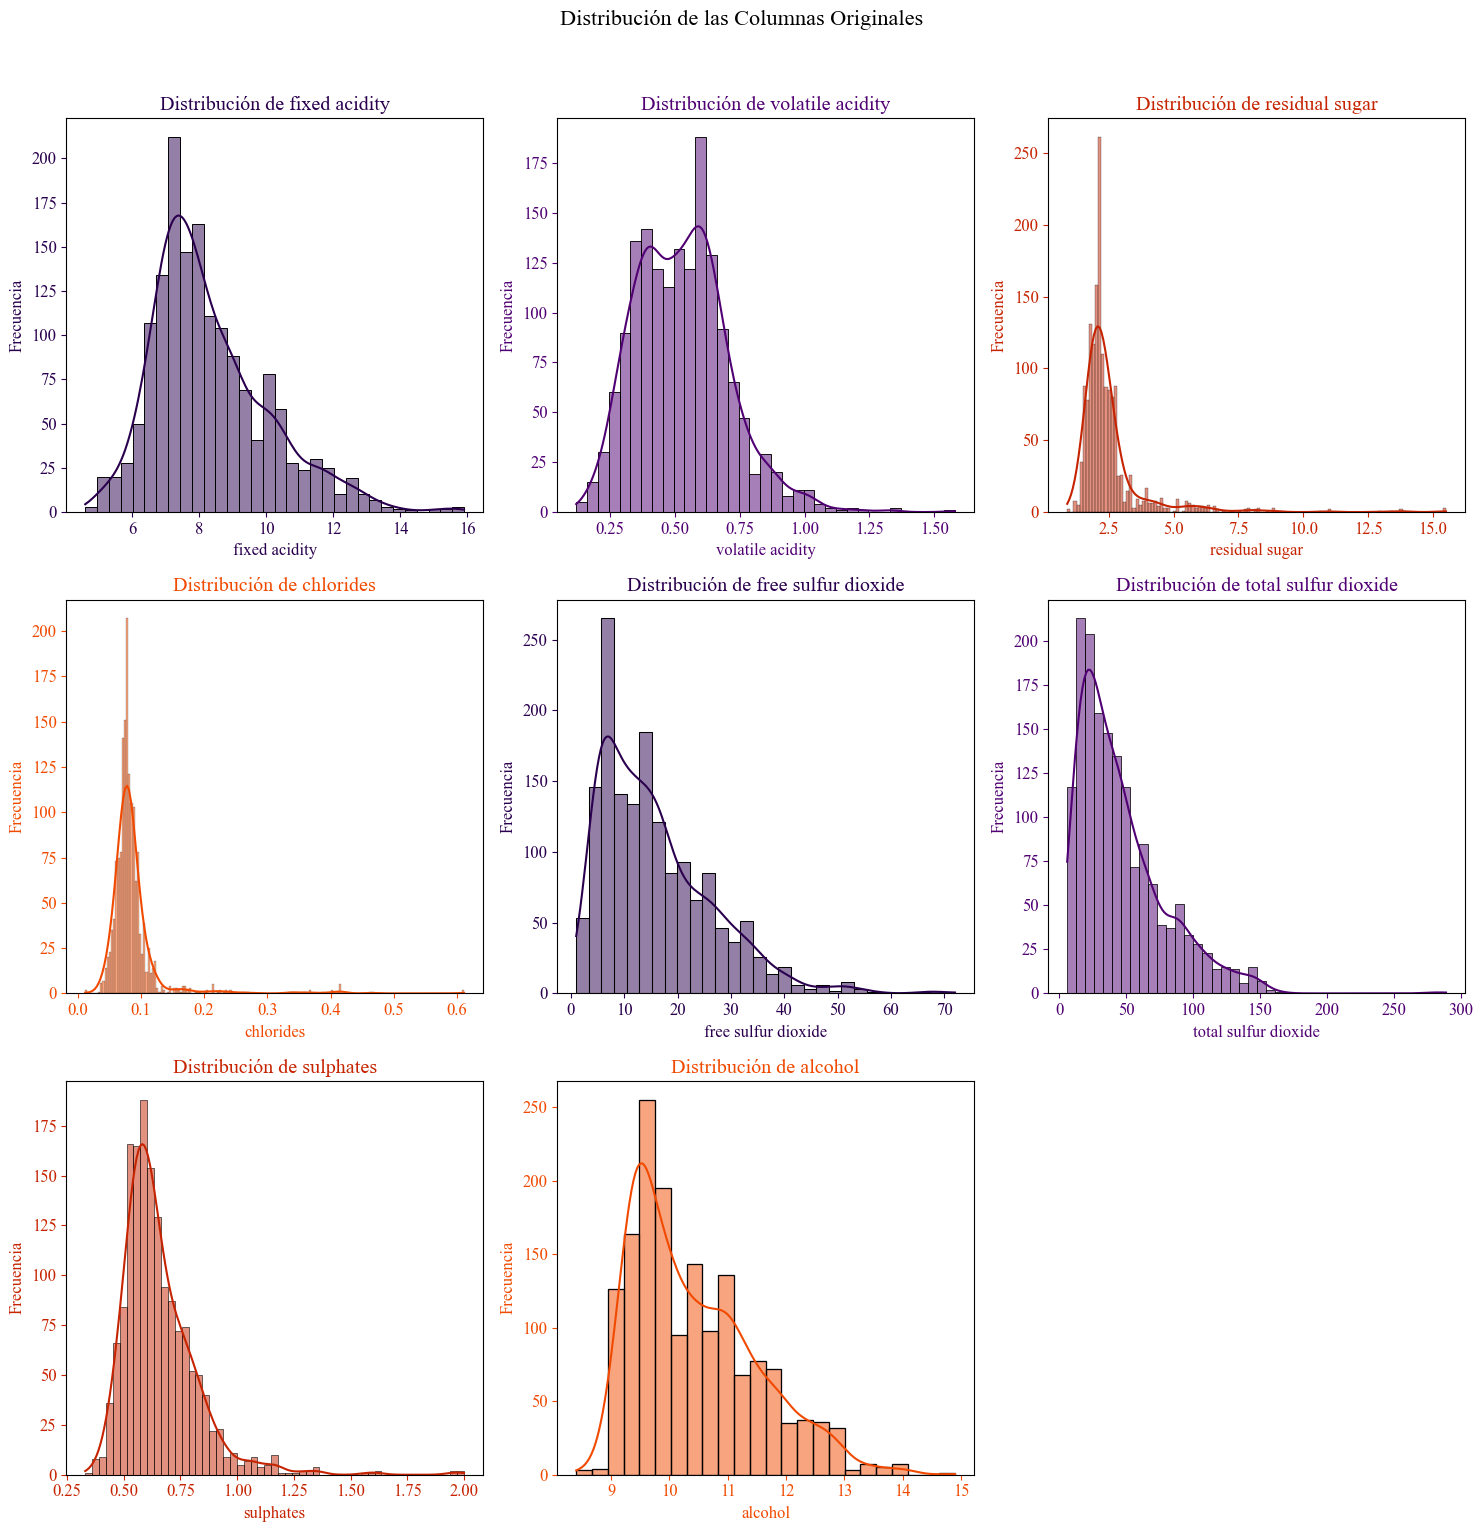

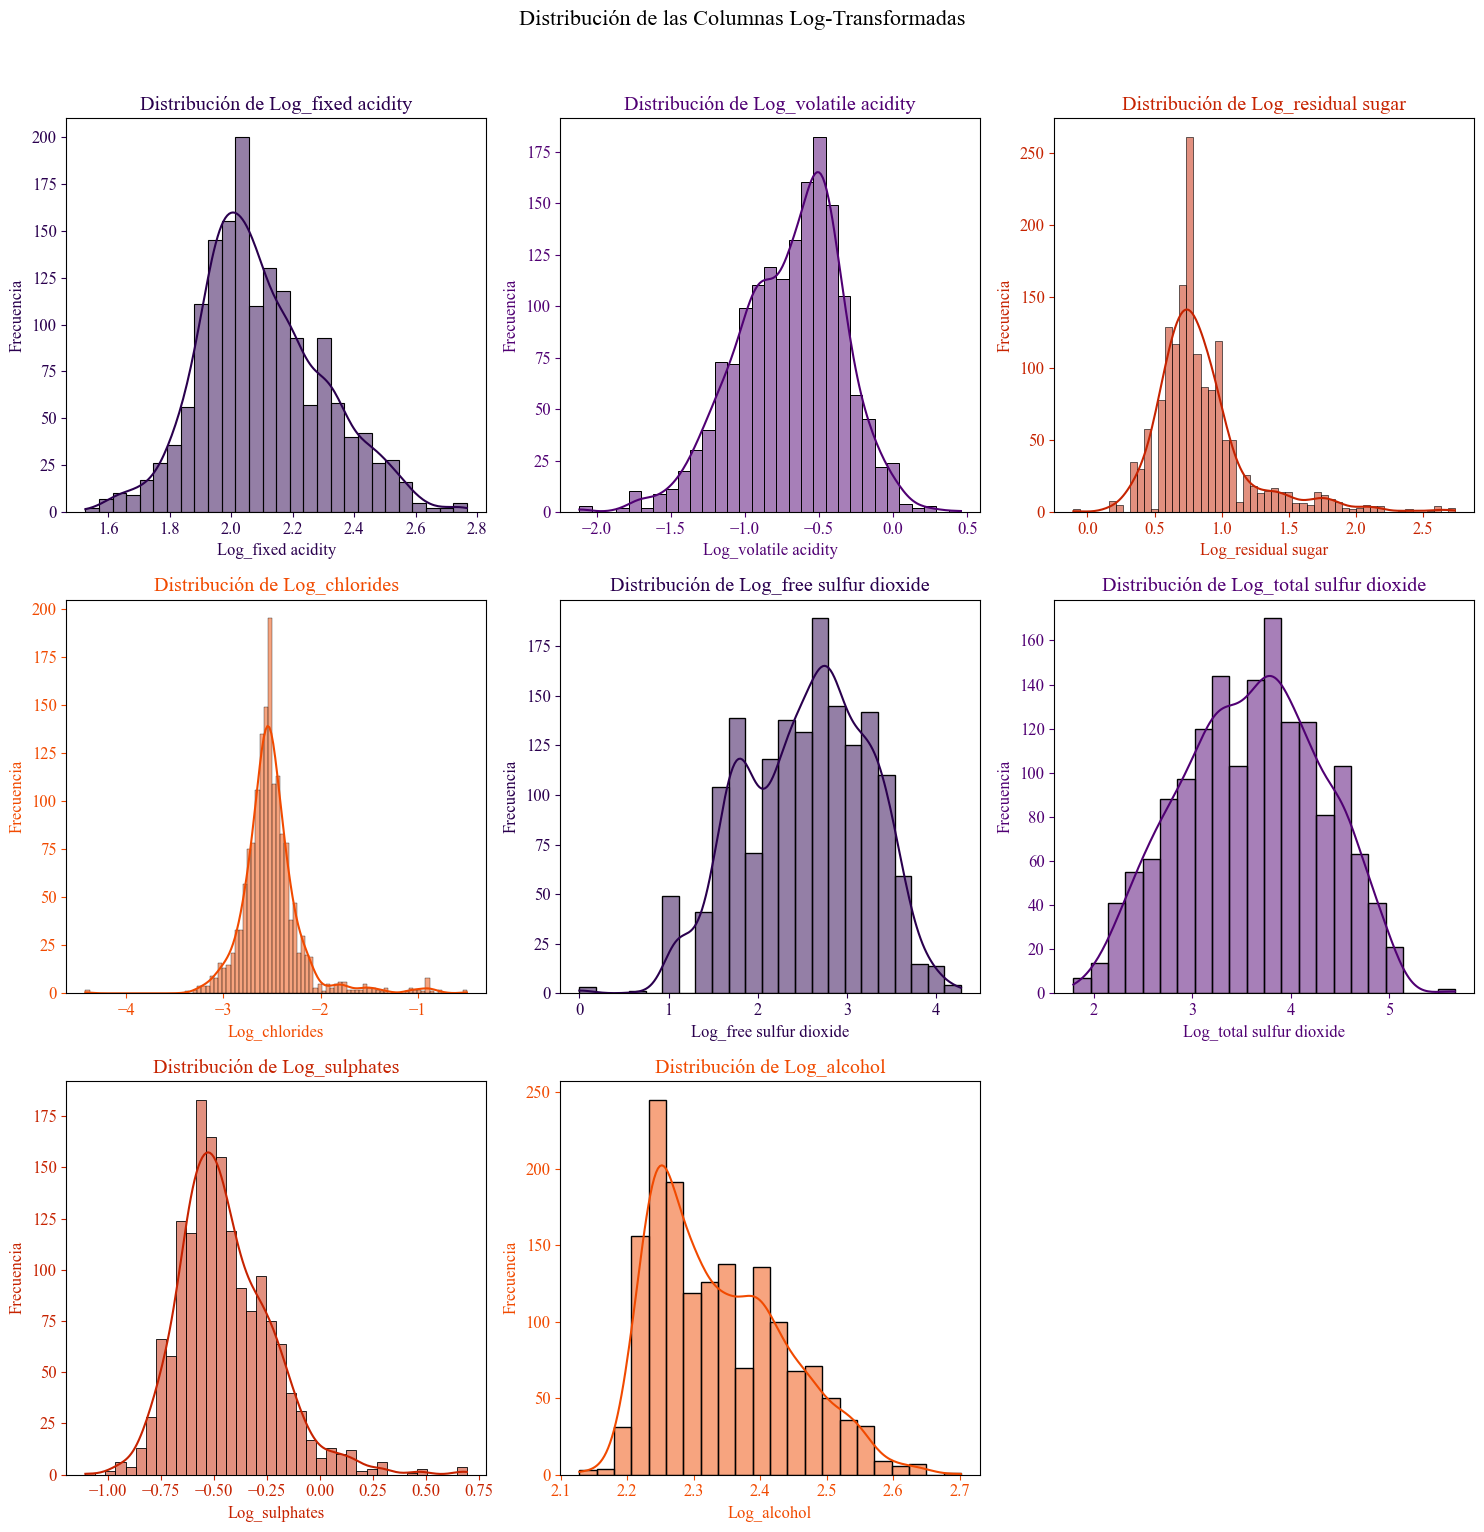

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores
colores = ['#2A004E', '#500073', '#C62300', '#F14A00']

# Lista de columnas originales a transformar
columnas_originales = ['fixed acidity', 'volatile acidity', 'residual sugar',
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                       'sulphates', 'alcohol']

# Lista de columnas log-transformadas
columnas_log_transformadas = [f"Log_{col}" for col in columnas_originales]

# --- Gráficas de las columnas originales ---
n_columnas_orig = len(columnas_originales)
n_filas_orig = (n_columnas_orig + 2) // 3
plt.figure(figsize=(15, 5 * n_filas_orig))
plt.suptitle('Distribución de las Columnas Originales', y=1.02, fontsize=16)

for i, col in enumerate(columnas_originales):
    plt.subplot(n_filas_orig, 3, i + 1)
    color_index = i % len(colores)  # Usar los colores de forma cíclica
    sns.histplot(data[col], kde=True, color=colores[color_index])
    plt.title(f'Distribución de {col}', color=colores[color_index])
    plt.xlabel(col, color=colores[color_index])  # Corregido: pasar el nombre de la columna como etiqueta
    plt.ylabel('Frecuencia', color=colores[color_index])
    plt.tick_params(axis='x', colors=colores[color_index])
    plt.tick_params(axis='y', colors=colores[color_index])

plt.tight_layout()
plt.show()

# --- Gráficas de las columnas log-transformadas ---
n_columnas_log = len(columnas_log_transformadas)
n_filas_log = (n_columnas_log + 2) // 3
plt.figure(figsize=(15, 5 * n_filas_log))
plt.suptitle('Distribución de las Columnas Log-Transformadas', y=1.02, fontsize=16)

for i, col in enumerate(columnas_log_transformadas):
    plt.subplot(n_filas_log, 3, i + 1)
    color_index = i % len(colores)  # Usar los colores de forma cíclica
    sns.histplot(data_transformada[col], kde=True, color=colores[color_index])
    plt.title(f'Distribución de {col}', color=colores[color_index])
    plt.xlabel(col, color=colores[color_index])  # Corregido: pasar el nombre de la columna como etiqueta
    plt.ylabel('Frecuencia', color=colores[color_index])
    plt.tick_params(axis='x', colors=colores[color_index])
    plt.tick_params(axis='y', colors=colores[color_index])

plt.tight_layout()
plt.show()

#### Cambiar la variable dependiente

 Predecir una de las 6 clases (3, 4, 5, 6, 7, 8) de la variable objetivo es un problema de clasificación multiclase. Convertirlo a dos clases (0 y 1) simplifica el problema a una clasificación binaria. Al definir un umbral de 6.5 se está destacando la distinción entre vinos considerados de "mala" calidad con una puntuación menor a 7 y vinos de "buena" calidad con una puntuación 7 o superior.  

C:\Users\shara\AppData\Local\Temp\ipykernel_25352\4070438591.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=quality_original, palette=colores)
C:\Users\shara\AppData\Local\Temp\ipykernel_25352\4070438591.py:19: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=quality_original, palette=colores)
C:\Users\shara\AppData\Local\Temp\ipykernel_25352\4070438591.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=quality_binaria, palette=colores)
C:\Users\shara\AppData\Local\Temp\ipykernel_25352\4070438591.py:26: UserWarning: The palette list has more values (4) than needed (2), which may 

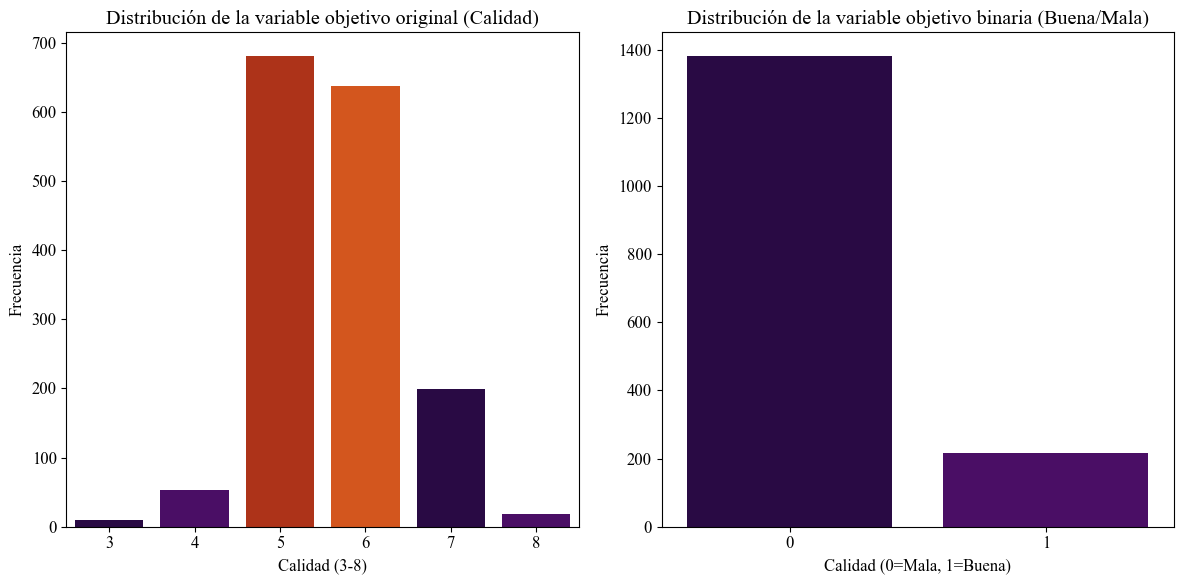

In [30]:
def binarizar_calidad(df, umbral=6.5):
    df = df.copy()
    df['quality_binaria'] = (df['quality'] >= umbral).astype(int)
    return df

# Aplicar la función
data = binarizar_calidad(data)

# Guardar la variable objetivo binaria en una variable aparte (si lo necesitas)
quality_binaria = data['quality_binaria']

# Configurar la fuente para los gráficos
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Visualización de la variable objetivo original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=quality_original, palette=colores)
plt.title('Distribución de la variable objetivo original (Calidad)')
plt.xlabel('Calidad (3-8)')
plt.ylabel('Frecuencia')

# Visualización de la variable objetivo binaria
plt.subplot(1, 2, 2)
sns.countplot(x=quality_binaria, palette=colores)
plt.title('Distribución de la variable objetivo binaria (Buena/Mala)')
plt.xlabel('Calidad (0=Mala, 1=Buena)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



####  Dividir los datos en conjuntos de entrenamiento y prueba

In [7]:
from sklearn.model_selection import train_test_split
# Variables de Características (Predictoras)
x = data.drop('quality_binaria', axis=1)
# Variable Objetivo (a Predecir)
Y = data['quality_binaria']
x_entrenamiento, x_prueba, Y_entrenamiento, Y_prueba = train_test_split(x, Y, test_size=0.25, random_state=44)

####  Análisis de Componentes Principales (PCA) 

El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para la reducción de dimensionalidad en conjuntos de datos, cuyo objetivo es simplificar la complejidad de los datos conservando la mayor cantidad posible de la información original. PCA transforma un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas componentes principales, los cuales son combinaciones lineales de las variables originales, ortogonales entre sí (no correlacionadas) y ordenadas por la cantidad de varianza que explican. El primer componente principal explica la mayor parte de la variabilidad en los datos, el segundo explica la segunda mayor parte, y así sucesivamente. Estas nuevas columnas son los componentes principales, y se espera que capturen la mayor parte de la información relevante de los datos originales en un espacio de menor dimensión. Estos componentes principales son los que luego se utilizan para entrenar modelos de clasificación, como la Regresión Logística, permitiendo reducir la complejidad del modelo, acelerar el entrenamiento, facilitar la visualización en espacios de dos o tres dimensiones, eliminar ruido o variables poco relevantes, y en algunos casos mejorar el rendimiento predictivo.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Escalar las características de entrenamiento
# Se estandarizaron las características para que tengan media cero y varianza unitaria, lo cual es importante para que PCA funcione correctamente, ya que es sensible a la escala de las características.

scaler = StandardScaler()
x_entrenamiento_escalado = scaler.fit_transform(x_entrenamiento)

# 2. Aplicar PCA al conjunto de entrenamiento escalado
#  Se aplicó PCA para transformar las características originales en un nuevo conjunto de características (los componentes principales) que son combinaciones lineales de las originales y están ordenados por la cantidad de varianza que explican. Esto se hace para reducir la dimensionalidad del dataset mientras se intenta preservar la mayor cantidad posible de información importante.

pca = PCA()
x_entrenamiento_pca = pca.fit_transform(x_entrenamiento_escalado)

# 3. Escalar las características de prueba usando el mismo escalador ajustado con los datos de entrenamiento
x_prueba_escalado = scaler.transform(x_prueba)

# 4. Aplicar la misma transformación PCA al conjunto de prueba escalado
x_prueba_pca = pca.transform(x_prueba_escalado)

# 5. Imprimir la forma de los datos transformados por PCA
print(f"Forma de x_entrenamiento después de PCA: {x_entrenamiento_pca.shape}")
print(f"Forma de x_prueba después de PCA: {x_prueba_pca.shape}")

# 6. Imprimir la varianza explicada por cada componente principal (opcional)
print("\nVarianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Forma de x_entrenamiento después de PCA: (1199, 12)
Forma de x_prueba después de PCA: (400, 12)

Varianza explicada por cada componente principal:
[0.26672223 0.19873368 0.14656684 0.09004059 0.08390715 0.05552687
 0.05067371 0.03887992 0.02883283 0.02165529 0.01394069 0.0045202 ]


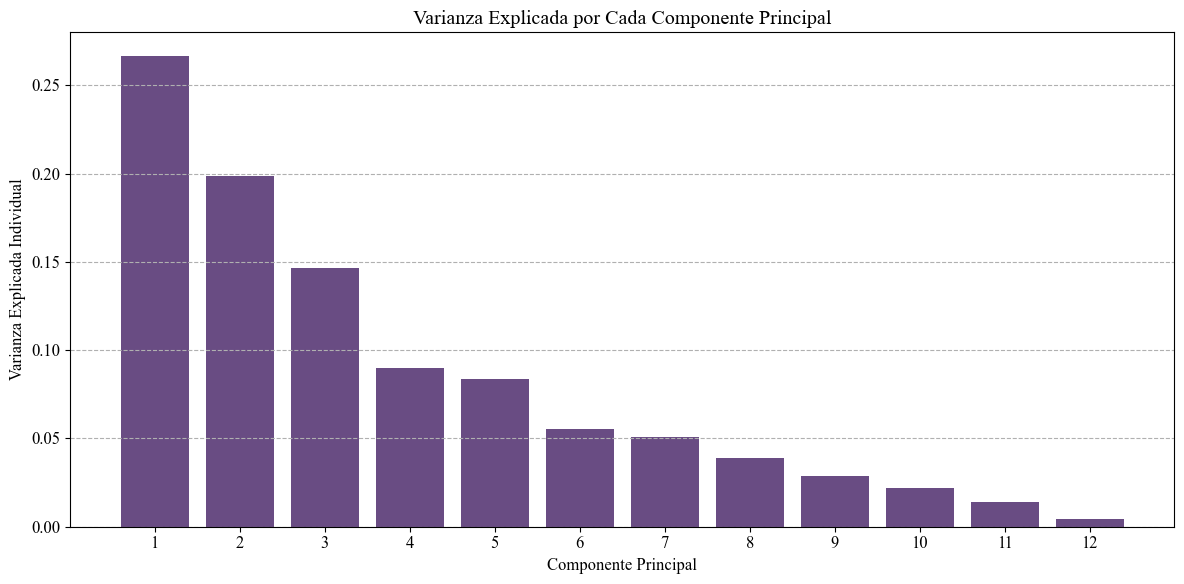

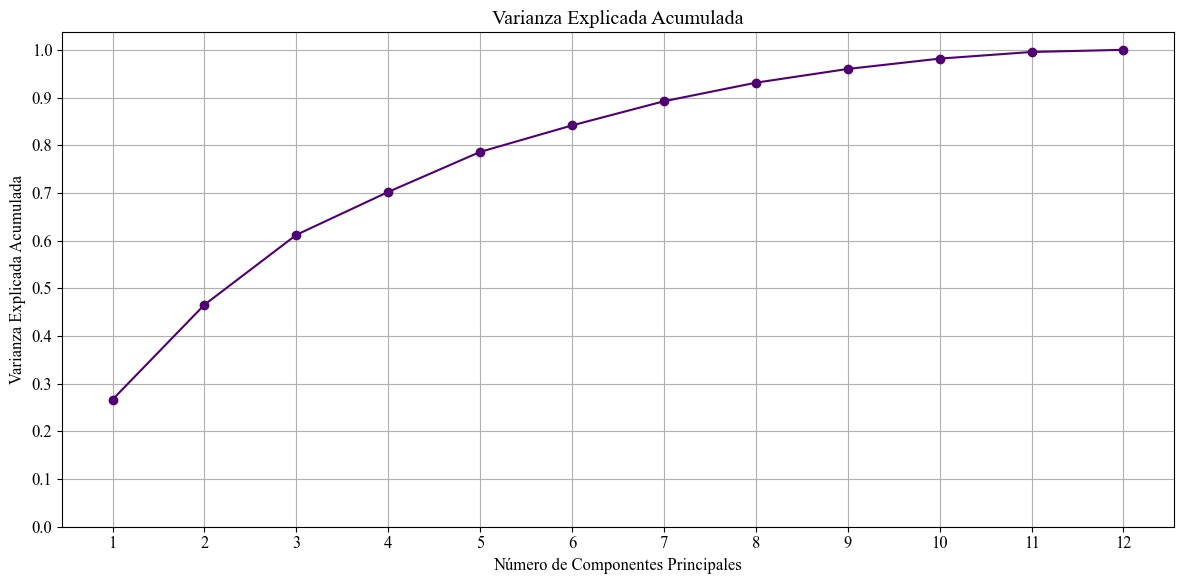

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Lista de colores (usando los que proporcionaste)
colores = ['#2A004E', '#500073', '#C62300', '#F14A00']

# Configurar la fuente para los gráficos
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 1. Gráfico de barras de la varianza explicada por cada componente
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color=colores[0], alpha=0.7)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada Individual')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 2. Gráfico de la varianza explicada acumulada
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color=colores[1])
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Aplicar PCA al conjunto de entrenamiento escalado, conservando 6 componentes
n_componentes = 6
pca = PCA(n_components=n_componentes)
x_entrenamiento_pca = pca.fit_transform(x_entrenamiento_escalado)

# 2. Escalar las características de prueba usando el mismo escalador
x_prueba_escalado = scaler.transform(x_prueba)

# 3. Aplicar la misma transformación PCA al conjunto de prueba escalado
x_prueba_pca = pca.transform(x_prueba_escalado)

# 4. Imprimir la forma de los datos transformados por PCA con 6 componentes
print(f"Forma de x_entrenamiento después de PCA (6 componentes): {x_entrenamiento_pca.shape}")
print(f"Forma de x_prueba después de PCA ( 6 componentes): {x_prueba_pca.shape}")

# 5. Imprimir la varianza explicada acumulada por los primeros 6 componentes
cumulative_explained_variance_6 = np.cumsum(pca.explained_variance_ratio_)
print(f"\nVarianza explicada acumulada por los primeros {n_componentes} componentes: {cumulative_explained_variance_6[-1]:.4f}")

Forma de x_entrenamiento después de PCA (6 componentes): (1199, 6)
Forma de x_prueba después de PCA ( 6 componentes): (400, 6)

Varianza explicada acumulada por los primeros 6 componentes: 0.8161


Inicialmente, después de la transformación logarítmica, se tenían 12 características. Al aplicar PCA y seleccionar los primeros 6 componentes principales, se han transformado los conjuntos de entrenamiento y prueba a una nueva representación de 9 dimensiones, reteniendo aproximadamente el 81.61% de la varianza total de los datos originales. Esta reducción de dimensionalidad busca simplificar el problema para los modelos de clasificación posteriores, preservando la mayor parte de la información relevante y potencialmente mejorando su rendimiento y capacidad de generalización.

#### Modelo  baseline: Modelo de Regresión Logística 

Un modelo de regresión logística es un algoritmo de clasificación supervisada utilizado para predecir la probabilidad de que una observación pertenezca a una de dos clases posibles

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd


#  Escalar y aplicar PCA 
scaler = StandardScaler()
x_entrenamiento_escalado = scaler.fit_transform(x_entrenamiento)
x_prueba_escalado = scaler.transform(x_prueba)

n_componentes = 6
pca = PCA(n_components=n_componentes, random_state=42)
x_entrenamiento_pca = pca.fit_transform(x_entrenamiento_escalado)
x_prueba_pca = pca.transform(x_prueba_escalado)

#  Entrenar el modelo baseline
modelo_baseline = LogisticRegression(random_state=42)

# Entrenar el modelo baseline con los datos de entrenamiento transformados por PCA
modelo_baseline.fit(x_entrenamiento_pca, Y_entrenamiento)

# Realizar predicciones en el conjunto de prueba
predicciones_baseline = modelo_baseline.predict(x_prueba_pca)
predicciones_proba_baseline = modelo_baseline.predict_proba(x_prueba_pca)[:, 1]

# Evaluar el rendimiento del modelo baseline en el conjunto de prueba
accuracy_baseline = accuracy_score(Y_prueba, predicciones_baseline)
roc_auc_baseline = roc_auc_score(Y_prueba.astype(int), predicciones_proba_baseline) # Aseguramos que Y_prueba sea entero

print("Rendimiento del modelo baseline (Regresión Logística) en el conjunto de prueba:")
print(f"Accuracy: {accuracy_baseline:.4f}")
print(f"AUC ROC: {roc_auc_baseline:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(Y_prueba, predicciones_baseline, zero_division=0))

# Evaluar el rendimiento del modelo baseline usando validación cruzada en el conjunto de entrenamiento
cv_scores_baseline_accuracy = cross_val_score(modelo_baseline, x_entrenamiento_pca, Y_entrenamiento.astype(int), cv=5, scoring='accuracy') # Aseguramos que Y_entrenamiento sea entero
cv_scores_baseline_roc_auc = cross_val_score(modelo_baseline, x_entrenamiento_pca, Y_entrenamiento.astype(int), cv=5, scoring='roc_auc') # Aseguramos que Y_entrenamiento sea entero

print("\nRendimiento del modelo baseline (Regresión Logística) con validación cruzada en el conjunto de entrenamiento:")
print(f"Accuracy promedio (CV): {cv_scores_baseline_accuracy.mean():.4f} (+/- {cv_scores_baseline_accuracy.std():.4f})")
print(f"AUC ROC promedio (CV): {cv_scores_baseline_roc_auc.mean():.4f} (+/- {cv_scores_baseline_roc_auc.std():.4f})")

Rendimiento del modelo baseline (Regresión Logística) en el conjunto de prueba:
Accuracy: 0.9800
AUC ROC: 0.9974

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       346
           1       0.91      0.94      0.93        54

    accuracy                           0.98       400
   macro avg       0.95      0.96      0.96       400
weighted avg       0.98      0.98      0.98       400


Rendimiento del modelo baseline (Regresión Logística) con validación cruzada en el conjunto de entrenamiento:
Accuracy promedio (CV): 0.9800 (+/- 0.0100)
AUC ROC promedio (CV): 0.9961 (+/- 0.0034)


Los resultados del modelo baseline de Regresión Logística indican una precisión del 98% y un AUC ROC de 99% en el conjunto de prueba, lo que refleja una capacidad casi perfecta para clasificar correctamente la calidad de los vinos. El reporte de clasificación muestra un desempeño sobresaliente en ambas clases, con valores de precisión y recall superiores al 90%. Además, la validación cruzada en el conjunto de entrenamiento indica una precisión promedio del 98% y un AUC ROC promedio de 0.9961, ambos con desviaciones estándar bajas.

#### Modelo ajustado con búsqueda aleatoria

La búsqueda aleatoria es una técnica de optimización de hiperparámetros que consiste en definir un espacio de valores posibles para cada hiperparámetro y luego seleccionar de forma aleatoria un número determinado de combinaciones. Cada una de estas combinaciones se evalúa mediante validación cruzada, lo que permite identificar configuraciones que mejoran el rendimiento del modelo sin necesidad de explorar exhaustivamente todas las posibles opciones.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# Definir el modelo de Regresión Logística
modelo_lr = LogisticRegression(random_state=42)

# Definir el espacio de hiperparámetros para la búsqueda aleatoria (combinaciones válidas)
espacio_hiperparametros_lr = [
    {'penalty': ['l1'], 'C': np.logspace(-4, 4, 20), 'solver': ['liblinear', 'saga']},
    {'penalty': ['l2'], 'C': np.logspace(-4, 4, 20), 'solver': ['liblinear', 'lbfgs', 'sag', 'saga']},
    {'penalty': ['elasticnet'], 'C': np.logspace(-4, 4, 20), 'solver': ['saga'], 'l1_ratio': np.linspace(0, 1, 10)},
    {'penalty': [None], 'solver': ['lbfgs', 'sag', 'newton-cg'], 'C': np.logspace(-4, 4, 20)}

    
]

# Realizar la búsqueda aleatoria con validación cruzada (6 folds)
random_search_lr = RandomizedSearchCV(modelo_lr,
                                     param_distributions=espacio_hiperparametros_lr,
                                     n_iter=100, # Número de combinaciones a probar
                                     scoring='roc_auc',
                                     cv=6,
                                     n_jobs=-1,
                                     random_state=42)

random_search_lr.fit(x_entrenamiento_pca, Y_entrenamiento)

# Obtener el mejor modelo y los mejores hiperparámetros encontrados
mejor_modelo_random_lr = random_search_lr.best_estimator_
mejores_hiperparametros_random_lr = random_search_lr.best_params_

print("Mejores hiperparámetros encontrados con Búsqueda Aleatoria:")
print(mejores_hiperparametros_random_lr)

# Evaluar el mejor modelo encontrado en el conjunto de prueba
predicciones_proba_random_lr = mejor_modelo_random_lr.predict_proba(x_prueba_pca)[:, 1]
roc_auc_random_lr_test = roc_auc_score(Y_prueba, predicciones_proba_random_lr)

print(f"\nAUC ROC del mejor modelo (Búsqueda Aleatoria) en el conjunto de prueba: {roc_auc_random_lr_test:.4f}")

Mejores hiperparámetros encontrados con Búsqueda Aleatoria:
{'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.23357214690901212)}

AUC ROC del mejor modelo (Búsqueda Aleatoria) en el conjunto de prueba: 0.9971


#### Modelo ajustado con Optuna

Optuna es una biblioteca de optimización de hiperparámetros que emplea un enfoque de optimización bayesiana. A diferencia de métodos que prueban combinaciones al azar, Optuna aprende de los resultados obtenidos en evaluaciones anteriores para sugerir nuevas combinaciones con mayor probabilidad de mejorar el rendimiento del modelo.

In [56]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

def objective_lr_6_components_corrected(trial):
    # Definir el espacio de hiperparámetros para Optuna (combinaciones válidas)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'sag', 'saga'])
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1) if penalty == 'elasticnet' else None

    # Asegurar combinaciones válidas de solver y penalty
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'l2' and solver not in ['liblinear', 'lbfgs', 'sag', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'elasticnet' and solver != 'saga':
        raise optuna.exceptions.TrialPruned()
    if penalty is None and solver not in ['lbfgs', 'sag', 'newton-cg']:
        raise optuna.exceptions.TrialPruned()
    if solver == 'liblinear' and penalty is None:
        raise optuna.exceptions.TrialPruned()
    if solver in ['lbfgs', 'sag'] and penalty == 'l1':
        raise optuna.exceptions.TrialPruned()
    if solver in ['lbfgs', 'sag'] and penalty == 'elasticnet':
        raise optuna.exceptions.TrialPruned()
    if solver == 'newton-cg' and penalty in ['l1', 'elasticnet']:
        raise optuna.exceptions.TrialPruned()

    modelo = LogisticRegression(penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio, random_state=42)

    # Realizar validación cruzada estratificada
    cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
    roc_auc_scores = []
    for train_idx, val_idx in cv.split(x_entrenamiento_pca, Y_entrenamiento):
        X_train, X_val = x_entrenamiento_pca[train_idx], x_entrenamiento_pca[val_idx]
        y_train, y_val = Y_entrenamiento.iloc[train_idx], Y_entrenamiento.iloc[val_idx]
        modelo.fit(X_train, y_train)
        predicciones_proba = modelo.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, predicciones_proba)
        roc_auc_scores.append(roc_auc)

    return np.mean(roc_auc_scores)

# Ejecutar la optimización con Optuna
study_lr_6 = optuna.create_study(direction='maximize')
study_lr_6.optimize(objective_lr_6_components_corrected, n_trials=100) # Número de pruebas

# Obtener los mejores hiperparámetros encontrados por Optuna
mejor_hiperparametros_optuna_lr_6 = study_lr_6.best_params
print("\nMejores hiperparámetros encontrados con Optuna (6 componentes):")
print(mejor_hiperparametros_optuna_lr_6)

# Entrenar el modelo con los mejores hiperparámetros encontrados por Optuna
mejor_modelo_optuna_lr_6 = LogisticRegression(**mejor_hiperparametros_optuna_lr_6, random_state=42)
mejor_modelo_optuna_lr_6.fit(x_entrenamiento_pca, Y_entrenamiento)

# Evaluar el mejor modelo encontrado en el conjunto de prueba
predicciones_proba_optuna_lr_6 = mejor_modelo_optuna_lr_6.predict_proba(x_prueba_pca)[:, 1]
roc_auc_optuna_lr_test_6 = roc_auc_score(Y_prueba, predicciones_proba_optuna_lr_6)

print(f"\nAUC ROC del mejor modelo (Optuna, 6 componentes) en el conjunto de prueba: {roc_auc_optuna_lr_test_6:.4f}")

[I 2025-05-18 19:39:08,233] A new study created in memory with name: no-name-85d8eb16-78d6-41f3-9d1c-ff9240fbb202


C:\Users\shara\AppData\Local\Temp\ipykernel_25352\2708498352.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
c:\Users\shara\.venvs\clase\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shara\.venvs\clase\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shara\.venvs\clase\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shara\.venvs\clase\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means 


Mejores hiperparámetros encontrados con Optuna (6 componentes):
{'penalty': None, 'C': 2577.690377393477, 'solver': 'sag'}

AUC ROC del mejor modelo (Optuna, 6 componentes) en el conjunto de prueba: 0.9974


c:\Users\shara\.venvs\clase\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\shara\.venvs\clase\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Comparación entre modelos

#### Rendimiento en Validación Cruzada

In [60]:
print("Rendimiento en Validación Cruzada (Conjunto de Entrenamiento):")
print(f"Modelo Baseline - AUC ROC promedio (CV): {cv_scores_baseline_roc_auc.mean():.4f} (+/- {cv_scores_baseline_roc_auc.std():.4f})")
print(f"Modelo Búsqueda Aleatoria - AUC ROC promedio (CV): {random_search_lr.cv_results_['mean_test_score'].mean():.4f} (+/- {random_search_lr.cv_results_['std_test_score'].mean():.4f})")
print(f"Modelo Optuna (6 componentes) - AUC ROC promedio (CV): {study_lr_6.best_value:.4f}")

Rendimiento en Validación Cruzada (Conjunto de Entrenamiento):
Modelo Baseline - AUC ROC promedio (CV): 0.9961 (+/- 0.0034)
Modelo Búsqueda Aleatoria - AUC ROC promedio (CV): 0.9546 (+/- 0.0041)
Modelo Optuna (6 componentes) - AUC ROC promedio (CV): 0.9960



#### Rendimiento en el Conjunto de Prueba

In [62]:
print("\nRendimiento en el Conjunto de Prueba:")
print(f"Modelo Baseline - AUC ROC: {roc_auc_baseline:.4f}")
print(f"Modelo Búsqueda Aleatoria - AUC ROC: {roc_auc_random_lr_test:.4f}")
print(f"Modelo Optuna (6 componentes) - AUC ROC: {roc_auc_optuna_lr_test_6:.4f}")


Rendimiento en el Conjunto de Prueba:
Modelo Baseline - AUC ROC: 0.9974
Modelo Búsqueda Aleatoria - AUC ROC: 0.9971
Modelo Optuna (6 componentes) - AUC ROC: 0.9974


#### Conclusiones

El trabajo realizado demostró la efectividad de los modelos de Regresión Logística para la tarea de clasificación de la calidad del vino tinto. Los tres enfoques (modelo baseline, ajuste con búsqueda aleatoria y ajuste con Optuna) lograron un rendimiento excepcionalmente alto, con valores de AUC ROC cercanos a 0.99 tanto en la validación cruzada del conjunto de entrenamiento como en el conjunto de prueba.

Si bien el ajuste de hiperparámetros es una práctica importante para optimizar el rendimiento de los modelos, en este caso particular, el modelo baseline con sus hiperparámetros por defecto ya ofrecía un rendimiento muy competitivo, igualando incluso al mejor modelo encontrado por Optuna en el conjunto de prueba. La búsqueda aleatoria también produjo un modelo de alto rendimiento, aunque ligeramente inferior a los otros dos.

La optimización bayesiana con Optuna, aunque exploró el espacio de hiperparámetros de manera más inteligente que la búsqueda aleatoria, no resultó en una mejora sustancial sobre el rendimiento del baseline en el conjunto de prueba, al menos con la configuración y el número de pruebas realizados. Sin embargo, sí mostró un rendimiento comparable al baseline en la validación cruzada del entrenamiento.

En conclusión, para este conjunto de datos y problema específico, un modelo de Regresión Logística simple (el baseline) resultó ser una solución muy efectiva. Si bien las técnicas de ajuste de hiperparámetros son valiosas en muchos escenarios, aquí no condujeron a una mejora drástica en el rendimiento. Esto podría sugerir que el problema es bien separable linealmente en el espacio de características transformado por PCA, o que el modelo baseline ya estaba muy cerca del rendimiento óptimo. Los resultados obtenidos proporcionan una base sólida para futuras exploraciones o la implementación de un modelo para predecir la calidad del vino.